<a href="https://colab.research.google.com/github/iljeong/Final-Team10/blob/main/%ED%8C%8C%EC%9D%B4%EB%84%90_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_9%EC%9B%94_22%EC%9D%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

ML_links_df = pd.read_csv("/content/drive/MyDrive/파이널 프로젝트/MovieLens 24/links.csv")
ML_tags_df = pd.read_csv("/content/drive/MyDrive/파이널 프로젝트/MovieLens 24/tags.csv")
ML_ratings_df = pd.read_csv("/content/drive/MyDrive/파이널 프로젝트/MovieLens 24/ratings.csv")
ML_movies_df = pd.read_csv("/content/drive/MyDrive/파이널 프로젝트/MovieLens 24/movies.csv")

In [ ]:
import pandas as pd

# ratings 전처리
ML_ratings_df["datetime"] = pd.to_datetime(ML_ratings_df["timestamp"], unit="s", utc=True)
ML_ratings_df_2020 = ML_ratings_df[ML_ratings_df["datetime"] >= "2020-01-01"]

# tags 전처리
ML_tags_df["datetime"] = pd.to_datetime(ML_tags_df["timestamp"], unit="s", utc=True)
ML_tags_df_2020 = ML_tags_df[ML_tags_df["datetime"] >= "2020-01-01"]


In [ ]:
ML_tags_df.head(10)

,userId,movieId,tag,timestamp,datetime
0,22,26479,Kevin Kline,1583038886,2020-03-01 05:01:26+00:00
1,22,79592,misogyny,1581476297,2020-02-12 02:58:17+00:00
2,22,247150,acrophobia,1622483469,2021-05-31 17:51:09+00:00
3,34,2174,music,1249808064,2009-08-09 08:54:24+00:00
4,34,2174,weird,1249808102,2009-08-09 08:55:02+00:00
5,34,8623,Steve Martin,1249808497,2009-08-09 09:01:37+00:00
6,55,5766,the killls and the score,1319322078,2011-10-22 22:21:18+00:00
7,58,7451,bullying,1672551536,2023-01-01 05:38:56+00:00
8,58,7451,clique,1672551510,2023-01-01 05:38:30+00:00
9,58,7451,coming of age,1672551502,2023-01-01 05:38:22+00:00


In [ ]:
ML_tags_df_2020.head(10)

,userId,movieId,tag,timestamp,datetime
0,22,26479,Kevin Kline,1583038886,2020-03-01 05:01:26+00:00
1,22,79592,misogyny,1581476297,2020-02-12 02:58:17+00:00
2,22,247150,acrophobia,1622483469,2021-05-31 17:51:09+00:00
7,58,7451,bullying,1672551536,2023-01-01 05:38:56+00:00
8,58,7451,clique,1672551510,2023-01-01 05:38:30+00:00
9,58,7451,coming of age,1672551502,2023-01-01 05:38:22+00:00
10,58,7451,gossip,1672551527,2023-01-01 05:38:47+00:00
11,58,7451,high school,1672551496,2023-01-01 05:38:16+00:00
12,58,7451,teen movie,1672551500,2023-01-01 05:38:20+00:00
13,58,49272,'60s feel,1672551430,2023-01-01 05:37:10+00:00


In [ ]:
from google.colab import files

# ratings 저장
ML_ratings_df_2020.to_csv('ML_ratings_df.csv', index=False)
files.download('ML_ratings_df.csv')

# tags 저장
ML_tags_df_2020.to_csv('ML_tags_df.csv', index=False)
files.download('ML_tags_df.csv')

# movies 저장
ML_movies_df.to_csv('ML_movies_df.csv', index=False)
files.download('ML_movies_df.csv')

# links 저장
ML_links_df.to_csv('ML_links_df.csv', index=False)
files.download('ML_links_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
ML_links_df = pd.read_csv("/content/drive/MyDrive/파이널 프로젝트/전처리 파일/ML_links_df.csv")
ML_tags_df = pd.read_csv("/content/drive/MyDrive/파이널 프로젝트/전처리 파일/ML_tags_df.csv")
ML_ratings_df = pd.read_csv("/content/drive/MyDrive/파이널 프로젝트/전처리 파일/ML_ratings_df.csv")
ML_movies_df = pd.read_csv("/content/drive/MyDrive/파이널 프로젝트/전처리 파일/ML_movies_df.csv")

In [ ]:
import pandas as pd
import numpy as np

# =========================
# 0) 설정값
# =========================
TOP_PCT = 0.10   # 메인스트림(인기작) 정의 상위 10%

# =========================
# 1) 준비: 영화 개봉연도, 평가연도
# =========================
movies = ML_movies_df.copy()
ratings = ML_ratings_df.copy()

# (a) 개봉연도 추출
year_from_paren = movies["title"].str.extract(r"\((\d{4})\)\s*$", expand=False)
year_anywhere   = movies["title"].str.extract(r"(\d{4})", expand=False)
movies["release_year"] = pd.to_numeric(year_from_paren.fillna(year_anywhere), errors="coerce")

# (b) 평가연도
ratings["rating_year"] = pd.to_datetime(ratings["timestamp"], unit="s", utc=True).dt.year.astype("Int64")

# (c) merge
r = ratings.merge(movies[["movieId", "release_year"]], on="movieId", how="left")

# =========================
# 2) 평균/표준편차
# =========================
u_avg = r.groupby("userId")["rating"].mean().rename("u_avg")
u_std = r.groupby("userId")["rating"].std().rename("u_std")

# =========================
# 3) 메인스트림 지수
# =========================
movie_rate_cnt = r.groupby("movieId").size().rename("movie_rate_count")
movie_rate_cnt_rank = movie_rate_cnt.rank(pct=True, method="max")
popular_movies = movie_rate_cnt_rank[movie_rate_cnt_rank >= (1 - TOP_PCT)].index
r["is_mainstream"] = r["movieId"].isin(popular_movies).astype(int)

mainstream_idx = r.groupby("userId")["is_mainstream"].mean().rename("mainstream_idx")

# =========================
# 4) 신작 선호도
# =========================
valid_years = r.dropna(subset=["rating_year", "release_year"]).copy()
valid_years["year_gap"] = valid_years["rating_year"].astype(int) - valid_years["release_year"].astype(int)

fresh_mean = valid_years.groupby("userId")["year_gap"].mean().rename("fresh_mean")

# =========================
# 5) 희소성 지표 (IDF 중앙값)
# =========================
n_users = r["userId"].nunique()
df_m = r.groupby("movieId")["userId"].nunique().rename("df_m")
idf_m = np.log(n_users / (df_m + 1))
idf_m.name = "idf_m"

r = r.merge(idf_m.to_frame(), on="movieId", how="left")
idf_median = r.groupby("userId")["idf_m"].median().rename("idf_median")

# =========================
# 6) 최종 유저별 피처 테이블
# =========================
ML_user_features_df = (
    pd.concat([u_avg, u_std, mainstream_idx, fresh_mean, idf_median], axis=1)
      .reset_index()   # userId 포함
      .sort_values("userId")
)

# =========================
# 7) 저장 (컬럼명 그대로 포함됨)
# =========================
ML_user_features_df.to_csv("ML_user_features_df.csv", index=False, encoding="utf-8-sig")
print("저장 완료: ML_user_features_df.csv")
print(ML_user_features_df.head())

저장 완료: ML_user_features_df.csv
   userId     u_avg     u_std  mainstream_idx  fresh_mean  idf_median
0      22  3.736364  0.738207        0.981818   16.648148    2.657422
1      23  4.651515  0.384969        0.969697    6.878788    2.900441
2      25  3.327586  0.559420        0.988506   27.333333    2.603048
3      26  4.469697  0.648790        1.000000   20.666667    1.375247
4      28  3.929530  0.794874        0.932886    6.800000    3.356417


① 세그먼트 교차

- 방향성: avg_year_gap을 다른 세그먼트(예: 장르 다양성, 태그 참여 그룹)와 비교해 교차분석.
- 의미: “복고적 취향은 특정 장르나 태그 성향에 집중되는가?”
- 분석 질문: 태그 참여자가 비참여자보다 avg_year_gap이 작은가? (즉, 최신작을 더 선호하는가?)

In [ ]:
%%capture

!sudo apt-get install -y fonts-nanum

!sudo fc-cache -fv

!rm ~/.cache/matplotlib -rf



import matplotlib.pyplot as plt

import matplotlib.font_manager as fm

fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumGothic.ttf')

plt.rcParams['font.family'] = 'NanumGothic'

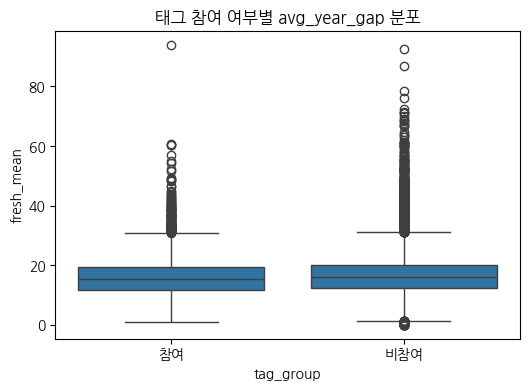

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 예: tag 참여 여부 그룹 만들기
tag_users = ML_tags_df.groupby("userId").size().reset_index(name="tag_count")
tag_users["tag_group"] = np.where(tag_users["tag_count"] > 0, "참여", "비참여")

df = ML_user_features_df.merge(tag_users[["userId","tag_group"]], on="userId", how="left").fillna({"tag_group":"비참여"})

plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="tag_group", y="fresh_mean")  # fresh_mean=avg_year_gap
plt.title("태그 참여 여부별 avg_year_gap 분포")
plt.show()

In [ ]:
from scipy.stats import ttest_ind

# 데이터 준비
df = ML_user_features_df.merge(tag_users[["userId","tag_group"]], on="userId", how="left").fillna({"tag_group":"비참여"})
participating = df.loc[df["tag_group"]=="참여", "fresh_mean"].dropna()
non_participating = df.loc[df["tag_group"]=="비참여", "fresh_mean"].dropna()

t_stat, p_val = ttest_ind(participating, non_participating, equal_var=False)

print("태그 참여 여부별 avg_year_gap 차이")
print(f"t-stat = {t_stat:.3f}, p-value = {p_val:.5f}")


태그 참여 여부별 avg_year_gap 차이
t-stat = -3.805, p-value = 0.00014


② 연도별 흐름

- 방향성: 전체 사용자 집단의 avg_year_gap 평균을 연도별로 계산.
- 의미: “시간이 갈수록 신작 중심 소비가 늘어났는가?”
- 분석 질문: 2000년대 vs 2020년대의 평균 차이는?

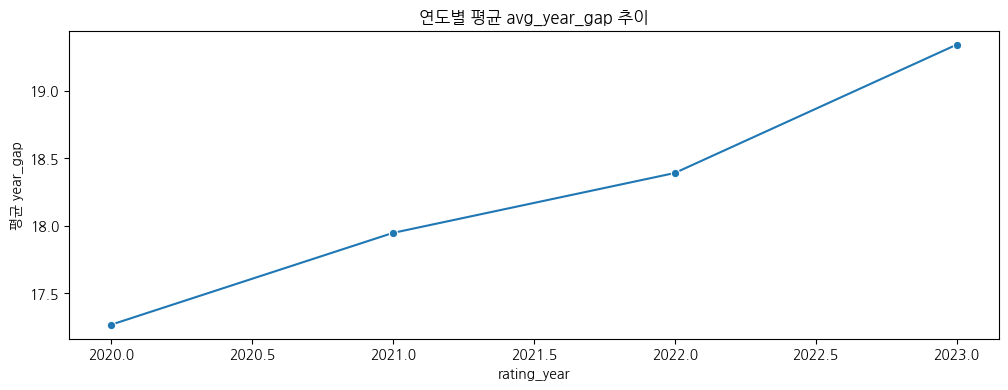

In [ ]:
# 평가연도별 avg_year_gap 계산
r = ML_ratings_df.merge(ML_movies_df[["movieId","title"]], on="movieId", how="left")
r["release_year"] = r["title"].str.extract(r"\((\d{4})\)").astype(float)
r["rating_year"] = pd.to_datetime(r["timestamp"], unit="s", utc=True).dt.year

r["year_gap"] = r["rating_year"] - r["release_year"]

trend = r.groupby("rating_year")["year_gap"].mean().reset_index()

plt.figure(figsize=(12,4))
sns.lineplot(data=trend, x="rating_year", y="year_gap", marker="o")
plt.title("연도별 평균 avg_year_gap 추이")
plt.ylabel("평균 year_gap")
plt.show()

In [ ]:
from scipy.stats import f_oneway

# 연도별 그룹 나누기
groups = [grp["year_gap"].values for _, grp in r.groupby("rating_year")]

f_stat, p_val = f_oneway(*groups)

print("연도별 avg_year_gap 차이")
print(f"F-stat = {f_stat:.3f}, p-value = {p_val:.5f}")


연도별 avg_year_gap 차이
F-stat = nan, p-value = nan


③ 시간 흐름 기반 개인 변화

- 방향성: 유저별로 “초창기 평가 vs 최근 평가”의 avg_year_gap 비교.
- 의미: “개인 성향이 시간이 갈수록 바뀌는가?”
- 분석 질문: 오래 활동한 유저일수록 year_gap이 줄어드는가?

/tmp/ipython-input-3105315665.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  user_change = r_sorted.groupby("userId").apply(split_avg_gap).reset_index()


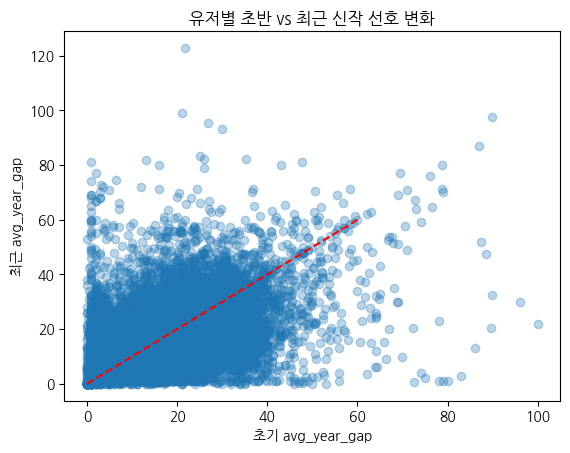

In [ ]:
r_sorted = r.sort_values(["userId","timestamp"])
# 각 userId별 앞 20%, 뒤 20% 구간 나누기
def split_avg_gap(grp):
    n = len(grp)
    head = grp.head(max(1, n//5))["year_gap"].mean()
    tail = grp.tail(max(1, n//5))["year_gap"].mean()
    return pd.Series({"early_gap": head, "recent_gap": tail})

user_change = r_sorted.groupby("userId").apply(split_avg_gap).reset_index()
user_change["gap_diff"] = user_change["recent_gap"] - user_change["early_gap"]

plt.scatter(user_change["early_gap"], user_change["recent_gap"], alpha=0.3)
plt.plot([0,60],[0,60], 'r--')
plt.xlabel("초기 avg_year_gap")
plt.ylabel("최근 avg_year_gap")
plt.title("유저별 초반 vs 최근 신작 선호 변화")
plt.show()

In [ ]:
from scipy.stats import ttest_rel

paired = user_change.dropna(subset=["early_gap","recent_gap"])

t_stat, p_val = ttest_rel(paired["early_gap"], paired["recent_gap"])

print("개인 초기 vs 최근 avg_year_gap 차이")
print(f"t-stat = {t_stat:.3f}, p-value = {p_val:.5f}")

개인 초기 vs 최근 avg_year_gap 차이
t-stat = 23.895, p-value = 0.00000


④ 영화 특징과 연결

- 방향성: 특정 영화가 ‘복고 유저 vs 최신작 유저’에서 평점 차이를 보이는지 분석.
- 의미: “과거작 선호자가 좋아하는 영화는 따로 있는가?”
- 분석 질문: 복고 성향 유저와 최신작 성향 유저가 같은 영화에 다른 평점을 주는가?

In [ ]:
# 유저 그룹화 (avg_year_gap 기준)
q1, q3 = ML_user_features_df["fresh_mean"].quantile([0.25, 0.75])
ML_user_features_df["gap_group"] = pd.cut(
    ML_user_features_df["fresh_mean"],
    bins=[-np.inf,q1,q3,np.inf],
    labels=["최신작 성향","중간","복고 성향"]
)

# 영화별 그룹 평균 평점
merged = ML_ratings_df.merge(ML_user_features_df[["userId","gap_group"]], on="userId")
movie_group_ratings = merged.groupby(["movieId","gap_group"])["rating"].mean().unstack()

print(movie_group_ratings.head())

/tmp/ipython-input-1203978030.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  movie_group_ratings = merged.groupby(["movieId","gap_group"])["rating"].mean().unstack()


gap_group    최신작 성향        중간     복고 성향
movieId                                
1          3.835725  3.947917  3.926220
2          3.723913  3.600515  3.439716
3          3.000000  3.000000  2.984848
4          1.500000  2.428571  2.900000
5          3.285714  3.022523  2.924528


In [ ]:
results = []
for mid, grp in merged.groupby("movieId"):
    groups = [sub["rating"].values for _, sub in grp.groupby("gap_group")]
    if len(groups) == 3 and all(len(g)>5 for g in groups):  # 최소 표본 확보
        f_stat, p_val = f_oneway(*groups)
        results.append((mid, f_stat, p_val))

movie_test_df = pd.DataFrame(results, columns=["movieId","F","p_value"]).sort_values("p_value")
print(movie_test_df.head(10))  # p-value 가장 작은 영화

/tmp/ipython-input-190924775.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [sub["rating"].values for _, sub in grp.groupby("gap_group")]


      movieId           F        p_value
3175    79132  287.146759  4.043337e-123
4399   122912  238.186406  3.411867e-101
4084   109487  231.295815   2.491540e-99
4400   122914  231.663539   1.176372e-98
3045    72998  212.507492   1.079342e-90
3458    89745  208.899251   7.428476e-89
3527    91529  194.997506   1.627626e-83
2688    59315  167.823634   3.546212e-72
2666    58559  151.666646   7.211674e-66
3525    91500  143.286628   2.535773e-61


⑤ 군집화 활용

- 방향성: avg_year_gap을 포함해 여러 지표(u_avg, u_std, mainstream_idx 등)로 유저 군집화.
- 의미: “복고 vs 최신작 중심 유저 클러스터의 다른 콘텐츠 소비 차이를 볼 수 있는가?”
- 분석 질문: 각 클러스터가 어떤 장르/태그/평가 패턴을 보이는가?

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

X = ML_user_features_df[["u_avg","u_std","mainstream_idx","fresh_mean","idf_median"]].dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

ML_user_features_df["cluster"] = -1
ML_user_features_df.loc[X.index,"cluster"] = clusters

# 클러스터별 평균 확인
print(ML_user_features_df.groupby("cluster")[["u_avg","u_std","mainstream_idx","fresh_mean","idf_median"]].mean())


            u_avg     u_std  mainstream_idx  fresh_mean  idf_median
cluster                                                            
-1       4.150649       NaN        0.922078   12.655352    2.963866
 0       3.387329  1.092393        0.967122   15.329358    2.608308
 1       4.054590  0.737453        0.976592   25.392165    2.323870
 2       4.157169  0.621858        0.986071   13.770328    2.129893
 3       3.448181  0.806130        0.704811   17.879716    4.802688


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols("fresh_mean ~ C(cluster)", data=ML_user_features_df[ML_user_features_df["cluster"]!=-1]).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                   sum_sq       df            F  PR(>F)
C(cluster)  519484.897412      3.0  5802.044482     0.0
Residual    864219.743016  28957.0          NaN     NaN


----

/tmp/ipython-input-1330591038.py:52: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ux4.groupby(["activity_quartile","genre_quartile"])


  activity_quartile genre_quartile  user_count  avg_year_gap  avg_rating  \
0            Q1(최단)         Q1(좁음)        2669     16.129365    4.113305   
1            Q1(최단)             Q2        2247     17.168804    4.013084   
2            Q1(최단)             Q3        1735     18.007604    3.866810   
3            Q1(최단)         Q4(다양)         686     18.696813    3.609282   
4                Q2         Q1(좁음)        2154     16.229008    4.095229   
5                Q2             Q2        2253     17.034584    4.015690   
6                Q2             Q3        1688     17.738003    3.858201   
7                Q2         Q4(다양)        1241     18.661610    3.640064   
8                Q3         Q1(좁음)        1413     14.152581    4.021447   
9                Q3             Q2        1608     15.936295    3.984831   

   mainstream  idf_median  
0    0.970202    2.226553  
1    0.980535    1.976674  
2    0.980154    2.183558  
3    0.940351    2.891992  
4    0.964787    2.2459

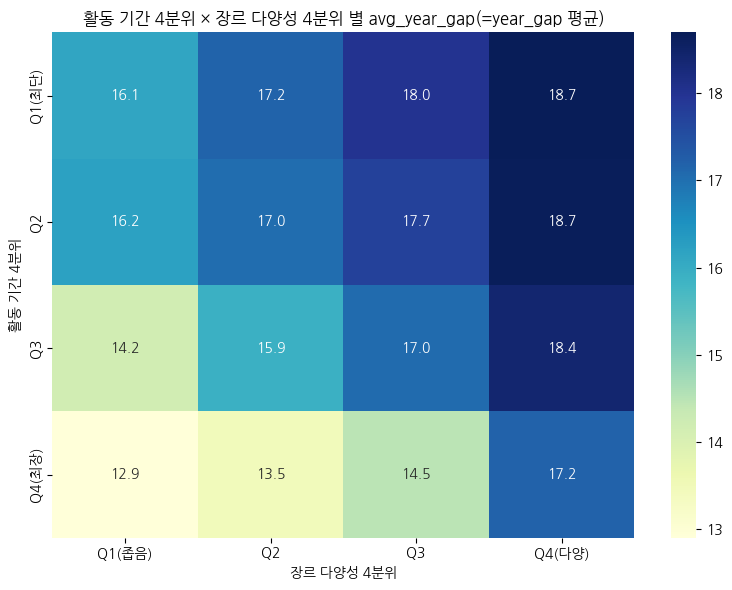

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# -------- 0) 안전한 qcut: 동률 많아도 잘 동작 --------
def q4_by_rank(s: pd.Series, labels):
    """
    동률이 많은 분포에서 qcut이 터지는 문제를 회피하기 위해
    순위(rank) → 분위수 자르기.
    labels 길이는 4여야 함.
    """
    s = pd.to_numeric(s, errors="coerce")
    r = s.rank(method="first")          # 동점에 고유 순서 부여
    return pd.qcut(r, 4, labels=labels) # Q1~Q4로 균등 분할

# -------- 1) 활동 기간(일) 계산 --------
rt = ML_ratings_df[["userId","timestamp"]].copy()
rt["ts"] = pd.to_datetime(rt["timestamp"], unit="s", utc=True)
span = rt.groupby("userId").agg(first=("ts","min"), last=("ts","max"))
span["tenure_days"] = (span["last"] - span["first"]).dt.days.clip(lower=0)

# 4분위 (활동 기간)
span["activity_quartile"] = q4_by_rank(
    span["tenure_days"],
    labels=["Q1(최단)","Q2","Q3","Q4(최장)"]
)

# -------- 2) 장르 다양성(고유 장르 수) 계산 --------
mv = ML_movies_df[["movieId","genres"]].copy()
rg = ML_ratings_df[["userId","movieId"]].drop_duplicates().merge(mv, on="movieId", how="left")
rg["genres"] = rg["genres"].fillna("(no genres listed)")
rg["genre_set"] = rg["genres"].str.split("|")
genre_div = rg.explode("genre_set").groupby("userId")["genre_set"].nunique().rename("uniq_genres").to_frame()

# 4분위 (장르 다양성)
genre_div["genre_quartile"] = q4_by_rank(
    genre_div["uniq_genres"],
    labels=["Q1(좁음)","Q2","Q3","Q4(다양)"]
)

# -------- 3) 유저 세그먼트(4x4) + 선호지표 결합 --------
user_seg4 = (
    span[["tenure_days","activity_quartile"]]
    .join(genre_div[["uniq_genres","genre_quartile"]], how="left")
    .reset_index()
)
ux4 = ML_user_features_df.merge(user_seg4, on="userId", how="left")

# 요약표
seg4_profile = (
    ux4.groupby(["activity_quartile","genre_quartile"])
       .agg(user_count=("userId","count"),
            avg_year_gap=("fresh_mean","mean"),
            avg_rating=("u_avg","mean"),
            mainstream=("mainstream_idx","mean"),
            idf_median=("idf_median","mean"))
       .reset_index()
)
print(seg4_profile.head(10))

# 검증: 각 분위수에 최소 몇 명 있는지 확인
print("\n활동기간 4분위 분포\n", span["activity_quartile"].value_counts(dropna=False).sort_index())
print("\n장르다양성 4분위 분포\n", genre_div["genre_quartile"].value_counts(dropna=False).sort_index())

# -------- 4) 시각화 (avg_year_gap heatmap) --------
plt.figure(figsize=(8,6))
pivot = seg4_profile.pivot(index="activity_quartile", columns="genre_quartile", values="avg_year_gap")
sns.heatmap(pivot, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("활동 기간 4분위 × 장르 다양성 4분위 별 avg_year_gap(=year_gap 평균)")
plt.xlabel("장르 다양성 4분위")
plt.ylabel("활동 기간 4분위")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# ---------- 공통 유틸 ----------
def extract_release_year_from_title(s: pd.Series) -> pd.Series:
    y1 = s.str.extract(r"\((\d{4})\)\s*$", expand=False)
    y2 = s.str.extract(r"(\d{4})", expand=False)
    return pd.to_numeric(y1.fillna(y2), errors="coerce")

def q4_by_rank(s: pd.Series, labels):
    """동률이 많아 qcut 경계가 겹칠 때를 대비한 안전한 4분위 분할"""
    r = pd.to_numeric(s, errors="coerce").rank(method="first")
    return pd.qcut(r, 4, labels=labels)

# ---------- A. 활동기간(일) 4분위 ----------
rt = ML_ratings_df[["userId","timestamp"]].copy()
rt["ts"] = pd.to_datetime(rt["timestamp"], unit="s", utc=True)
span = rt.groupby("userId").agg(first=("ts","min"), last=("ts","max"))
span["tenure_days"] = (span["last"] - span["first"]).dt.days.clip(lower=0)
span["activity_quartile"] = q4_by_rank(
    span["tenure_days"], labels=["Q1(최단)","Q2","Q3","Q4(최장)"]
)

# ---------- B. 장르 다양성(고유 장르 수) 4분위 ----------
mv = ML_movies_df[["movieId","genres"]].copy()
rg = ML_ratings_df[["userId","movieId"]].drop_duplicates().merge(mv, on="movieId", how="left")
rg["genres"] = rg["genres"].fillna("(no genres listed)")
rg["genre_set"] = rg["genres"].str.split("|")
genre_div = rg.explode("genre_set").groupby("userId")["genre_set"].nunique().rename("uniq_genres").to_frame()
genre_div["genre_quartile"] = q4_by_rank(
    genre_div["uniq_genres"], labels=["Q1(좁음)","Q2","Q3","Q4(다양)"]
)

# ---------- C. 유저 세그먼트(태그 제외) ----------
user_seg = (span[["tenure_days","activity_quartile"]]
            .join(genre_div[["uniq_genres","genre_quartile"]], how="left")
            .reset_index())

# ---------- D. 선호 지표 결합 ----------
ux = ML_user_features_df.merge(user_seg, on="userId", how="left")

# ---------- E. 교차 테이블(프로파일) ----------
seg_profile = (ux.groupby(["activity_quartile","genre_quartile"])
                 .agg(user_count=("userId","count"),
                      u_avg=("u_avg","mean"),
                      u_std=("u_std","mean"),
                      mainstream_idx=("mainstream_idx","mean"),
                      fresh_mean=("fresh_mean","mean"),
                      idf_median=("idf_median","mean"))
                 .reset_index()
                 .sort_values(["activity_quartile","genre_quartile"]))
seg_profile.to_csv("seg_profile_q4xq4.csv", index=False, encoding="utf-8-sig")
print(seg_profile.head(10))

  activity_quartile genre_quartile  user_count     u_avg     u_std  \
0            Q1(최단)         Q1(좁음)        2669  4.113305  0.707014   
1            Q1(최단)             Q2        2247  4.013084  0.802978   
2            Q1(최단)             Q3        1735  3.866810  0.840014   
3            Q1(최단)         Q4(다양)         686  3.609282  0.870069   
4                Q2         Q1(좁음)        2154  4.095229  0.716089   
5                Q2             Q2        2253  4.015690  0.794547   
6                Q2             Q3        1688  3.858201  0.831998   
7                Q2         Q4(다양)        1241  3.640064  0.871302   
8                Q3         Q1(좁음)        1413  4.021447  0.709016   
9                Q3             Q2        1608  3.984831  0.793835   

   mainstream_idx  fresh_mean  idf_median  
0        0.970202   16.129365    2.226553  
1        0.980535   17.168804    1.976674  
2        0.980154   18.007604    2.183558  
3        0.940351   18.696813    2.891992  
4        

/tmp/ipython-input-3047721580.py:43: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seg_profile = (ux.groupby(["activity_quartile","genre_quartile"])


In [ ]:
import statsmodels.formula.api as smf

# 평점 수(활동량) 통제변수
rc = ML_ratings_df.groupby("userId").size().rename("rating_count").reset_index()
dfm = ux.merge(rc, on="userId", how="left")
dfm["rating_count"] = dfm["rating_count"].fillna(0).astype(float)

# OLS: fresh_mean ~ 활동기간4 + 장르다양성4 + 활동량
ols = smf.ols("fresh_mean ~ C(activity_quartile) + C(genre_quartile) + rating_count",
              data=dfm).fit()
print(ols.summary())

# Logit: 복고 상위 25% (1) vs 나머지(0)
thr = dfm["fresh_mean"].quantile(0.75)
dfm["retro_top25"] = (dfm["fresh_mean"] >= thr).astype(int)
logit = smf.logit("retro_top25 ~ C(activity_quartile) + C(genre_quartile) + rating_count",
                  data=dfm).fit(disp=False)
print(logit.summary())

                            OLS Regression Results                            
Dep. Variable:             fresh_mean   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     212.6
Date:                Mon, 22 Sep 2025   Prob (F-statistic):          2.40e-309
Time:                        07:24:56   Log-Likelihood:                -98362.
No. Observations:               29344   AIC:                         1.967e+05
Df Residuals:                   29336   BIC:                         1.968e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [ ]:
# 전체 평균 평점(베이스라인)
global_mean = ML_ratings_df.groupby("movieId")["rating"].mean().rename("global_mean")
global_cnt  = ML_ratings_df.groupby("movieId").size().rename("global_cnt")

# 세그먼트 키 (태그 제외)
seg_key = ["activity_quartile","genre_quartile"]

rx = ML_ratings_df.merge(user_seg[["userId"]+seg_key], on="userId", how="left")

# 세그먼트별 영화 평균/표본수
seg_movie = (rx.groupby(seg_key+["movieId"])
               .agg(seg_mean=("rating","mean"), seg_cnt=("rating","size"))
               .reset_index())

# 베이스라인과 결합 → 델타로 랭킹
seg_movie = seg_movie.merge(global_mean.to_frame().join(global_cnt), on="movieId", how="left")
seg_movie["delta"] = seg_movie["seg_mean"] - seg_movie["global_mean"]

# 최소 표본 수 필터 (예: 세그먼트 내 50건 이상)
CUTOFF = 50
candidates = seg_movie.query("seg_cnt >= @CUTOFF").copy()

# 각 세그먼트 Top-N
def topn_by_segment(df, n=20):
    out = []
    for keys, grp in df.groupby(seg_key):
        g = grp.sort_values(["delta","seg_cnt"], ascending=[False,False]).head(n)
        g = g.assign(activity_quartile=keys[0], genre_quartile=keys[1])
        out.append(g)
    return pd.concat(out, ignore_index=True) if out else pd.DataFrame()

top_catalog = topn_by_segment(candidates, n=20)
top_catalog.to_csv("segment_top_catalog_q4xq4.csv", index=False, encoding="utf-8-sig")
print(top_catalog.head(10))

/tmp/ipython-input-2091828181.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seg_movie = (rx.groupby(seg_key+["movieId"])


  activity_quartile genre_quartile  movieId  seg_mean  seg_cnt  global_mean  \
0            Q1(최단)         Q1(좁음)   102125  4.113208       53     3.331296   
1            Q1(최단)         Q1(좁음)     6934  4.080882       68     3.354039   
2            Q1(최단)         Q1(좁음)   143355  4.080000       50     3.413503   
3            Q1(최단)         Q1(좁음)    88140  4.020000       50     3.380532   
4            Q1(최단)         Q1(좁음)    33493  4.017544       57     3.385625   
5            Q1(최단)         Q1(좁음)     8533  4.118182       55     3.507386   
6            Q1(최단)         Q1(좁음)     6942  4.164286       70     3.561642   
7            Q1(최단)         Q1(좁음)     8665  4.395062       81     3.808751   
8            Q1(최단)         Q1(좁음)    35836  4.028302       53     3.449365   
9            Q1(최단)         Q1(좁음)    91500  4.044944       89     3.497630   

   global_cnt     delta  
0        3681  0.781912  
1        3912  0.726843  
2        3266  0.666497  
3        4248  0.639468  


/tmp/ipython-input-2091828181.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for keys, grp in df.groupby(seg_key):


In [ ]:
import numpy as np

r = ML_ratings_df[["userId","movieId","rating","timestamp"]].copy()
r["ts"] = pd.to_datetime(r["timestamp"], unit="s", utc=True)
r = r.sort_values(["userId","ts"])

mv = ML_movies_df[["movieId","title"]].copy()
mv["release_year"] = extract_release_year_from_title(mv["title"])
r = r.merge(mv[["movieId","release_year"]], on="movieId", how="left")
r["rating_year"] = r["ts"].dt.year
r = r.dropna(subset=["release_year"])
r["year_gap"] = r["rating_year"] - r["release_year"]

def early_recent_gap(grp):
    n = len(grp); k = max(1, n//5)
    return pd.Series({
        "early_gap": grp.head(k)["year_gap"].mean(),
        "recent_gap": grp.tail(k)["year_gap"].mean()
    })

change = r.groupby("userId").apply(early_recent_gap).reset_index()
change["delta_gap"] = change["recent_gap"] - change["early_gap"]

share_more_retro = (change["delta_gap"]>0).mean()
share_more_recent = (change["delta_gap"]<0).mean()
print({"복고화(+) 비율": share_more_retro, "신작화(-) 비율": share_more_recent})

def label3(v, q1, q3):
    return "최신" if v<=q1 else ("복고" if v>=q3 else "중간")
q1_e,q3_e = change["early_gap"].quantile([0.25,0.75])
q1_r,q3_r = change["recent_gap"].quantile([0.25,0.75])
change["early_label"]  = change["early_gap"].apply(lambda v: label3(v,q1_e,q3_e))
change["recent_label"] = change["recent_gap"].apply(lambda v: label3(v,q1_r,q3_r))
transition = pd.crosstab(change["early_label"], change["recent_label"], normalize="index").round(3)
transition.to_csv("lifecycle_transition_matrix.csv", encoding="utf-8-sig")
print(transition)

{'복고화(+) 비율': np.float64(0.3991957470010905), '신작화(-) 비율': np.float64(0.5780057251908397)}
recent_label     복고     중간     최신
early_label                      
복고            0.468  0.426  0.107
중간            0.213  0.599  0.188
최신            0.107  0.376  0.517


/tmp/ipython-input-3257105322.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  change = r.groupby("userId").apply(early_recent_gap).reset_index()


In [ ]:
import numpy as np

r = ML_ratings_df[["userId","movieId","rating","timestamp"]].copy()
r["ts"] = pd.to_datetime(r["timestamp"], unit="s", utc=True)
r = r.sort_values(["userId","ts"])

mv = ML_movies_df[["movieId","title"]].copy()
mv["release_year"] = extract_release_year_from_title(mv["title"])
r = r.merge(mv[["movieId","release_year"]], on="movieId", how="left")
r["rating_year"] = r["ts"].dt.year
r = r.dropna(subset=["release_year"])
r["year_gap"] = r["rating_year"] - r["release_year"]

def early_recent_gap(grp):
    n = len(grp); k = max(1, n//5)
    return pd.Series({
        "early_gap": grp.head(k)["year_gap"].mean(),
        "recent_gap": grp.tail(k)["year_gap"].mean()
    })

change = r.groupby("userId").apply(early_recent_gap).reset_index()
change["delta_gap"] = change["recent_gap"] - change["early_gap"]

share_more_retro = (change["delta_gap"]>0).mean()
share_more_recent = (change["delta_gap"]<0).mean()
print({"복고화(+) 비율": share_more_retro, "신작화(-) 비율": share_more_recent})

def label3(v, q1, q3):
    return "최신" if v<=q1 else ("복고" if v>=q3 else "중간")
q1_e,q3_e = change["early_gap"].quantile([0.25,0.75])
q1_r,q3_r = change["recent_gap"].quantile([0.25,0.75])
change["early_label"]  = change["early_gap"].apply(lambda v: label3(v,q1_e,q3_e))
change["recent_label"] = change["recent_gap"].apply(lambda v: label3(v,q1_r,q3_r))
transition = pd.crosstab(change["early_label"], change["recent_label"], normalize="index").round(3)
transition.to_csv("lifecycle_transition_matrix.csv", encoding="utf-8-sig")
print(transition)

{'복고화(+) 비율': np.float64(0.3991957470010905), '신작화(-) 비율': np.float64(0.5780057251908397)}
recent_label     복고     중간     최신
early_label                      
복고            0.468  0.426  0.107
중간            0.213  0.599  0.188
최신            0.107  0.376  0.517


/tmp/ipython-input-3257105322.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  change = r.groupby("userId").apply(early_recent_gap).reset_index()


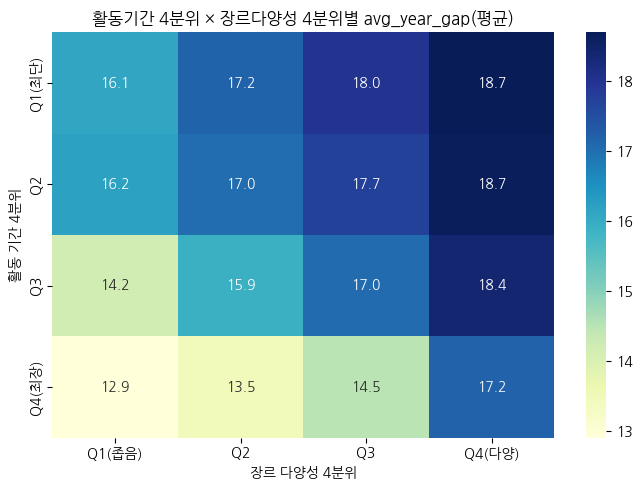

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 카테고리 순서(보기 좋게 고정)
act_order = ["Q1(최단)","Q2","Q3","Q4(최장)"]
gen_order = ["Q1(좁음)","Q2","Q3","Q4(다양)"]

pvt = (seg_profile
       .pivot(index="activity_quartile", columns="genre_quartile", values="fresh_mean")
       .reindex(index=act_order, columns=gen_order))

plt.figure(figsize=(7,5))
sns.heatmap(pvt, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("활동기간 4분위 × 장르다양성 4분위별 avg_year_gap(평균)")
plt.xlabel("장르 다양성 4분위")
plt.ylabel("활동 기간 4분위")
plt.tight_layout()
plt.show()

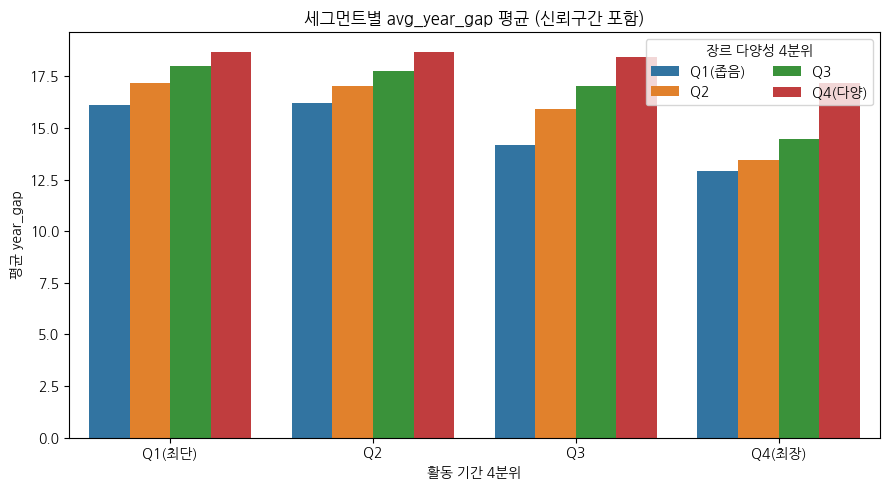

In [ ]:
plt.figure(figsize=(9,5))
sns.barplot(data=seg_profile,
            x="activity_quartile", y="fresh_mean",
            hue="genre_quartile", order=act_order, hue_order=gen_order,
            errorbar=("ci", 95))
plt.title("세그먼트별 avg_year_gap 평균 (신뢰구간 포함)")
plt.xlabel("활동 기간 4분위")
plt.ylabel("평균 year_gap")
plt.legend(title="장르 다양성 4분위", ncol=2)
plt.tight_layout()
plt.show()

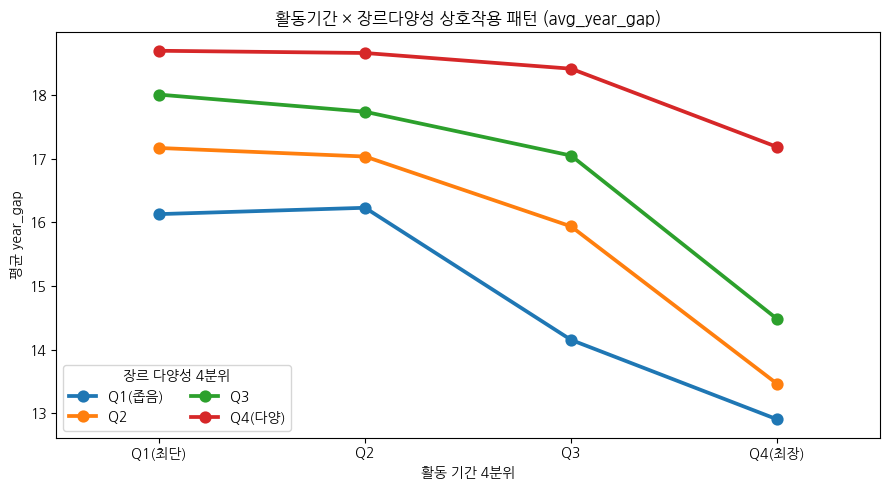

In [ ]:
plt.figure(figsize=(9,5))
sns.pointplot(data=seg_profile,
              x="activity_quartile", y="fresh_mean",
              hue="genre_quartile", order=act_order, hue_order=gen_order,
              errorbar=("ci", 95), markers="o", linestyles="-")
plt.title("활동기간 × 장르다양성 상호작용 패턴 (avg_year_gap)")
plt.xlabel("활동 기간 4분위")
plt.ylabel("평균 year_gap")
plt.legend(title="장르 다양성 4분위", ncol=2)
plt.tight_layout()
plt.show()

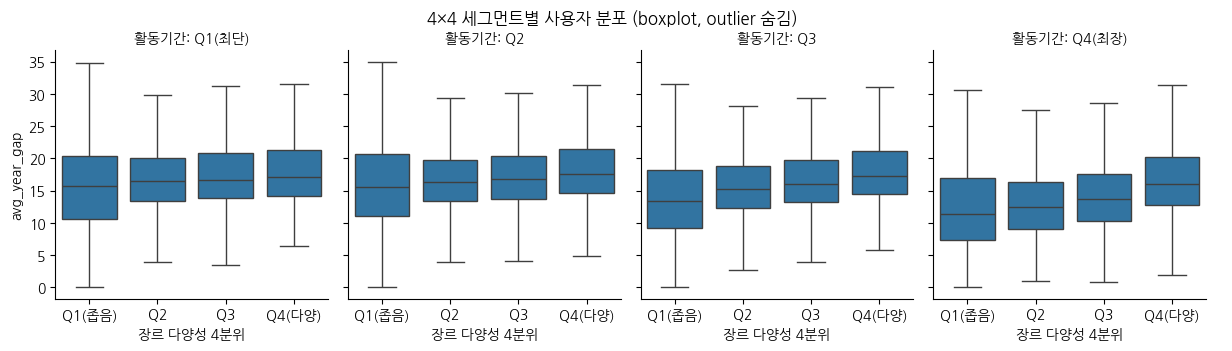

In [ ]:
# ux에 개별 유저의 fresh_mean이 있으므로, 4×4 격자 분포를 볼 수 있어요.
g = sns.catplot(
    data=ux, x="genre_quartile", y="fresh_mean",
    col="activity_quartile", order=gen_order, col_order=act_order,
    kind="box", height=3.4, aspect=0.9, showfliers=False
)
g.set_titles("활동기간: {col_name}")
g.set_axis_labels("장르 다양성 4분위", "avg_year_gap")
plt.suptitle("4×4 세그먼트별 사용자 분포 (boxplot, outlier 숨김)", y=1.02)
plt.show()

/tmp/ipython-input-1405168972.py:24: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


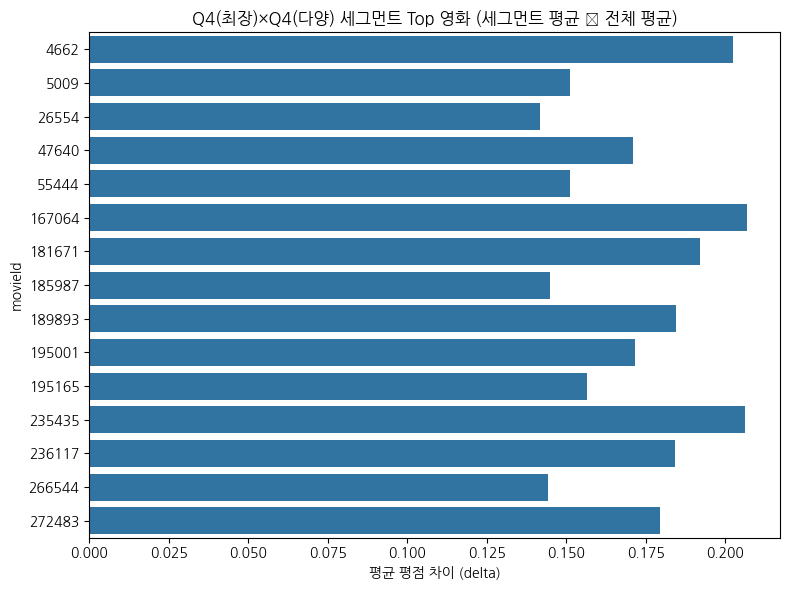

In [ ]:
# (앞서 만든 top_catalog 사용, 없으면 아래 3줄로 생성)
# --- 빠른 생성(요약) ---
global_mean = ML_ratings_df.groupby("movieId")["rating"].mean().rename("global_mean")
global_cnt  = ML_ratings_df.groupby("movieId").size().rename("global_cnt")
seg_key = ["activity_quartile","genre_quartile"]
rx = ML_ratings_df.merge(user_seg[["userId"]+seg_key], on="userId", how="left")
seg_movie = (rx.groupby(seg_key+["movieId"], observed=True)
               .agg(seg_mean=("rating","mean"), seg_cnt=("rating","size"))
               .reset_index())
seg_movie = seg_movie.merge(global_mean.to_frame().join(global_cnt), on="movieId", how="left")
seg_movie["delta"] = seg_movie["seg_mean"] - seg_movie["global_mean"]
candidates = seg_movie.query("seg_cnt >= 50").copy()

# 관심 세그먼트 선택
focus = candidates.query("activity_quartile=='Q4(최장)' and genre_quartile=='Q4(다양)'") \
                  .sort_values(["delta","seg_cnt"], ascending=[False,False]) \
                  .head(15)

plt.figure(figsize=(8,6))
sns.barplot(data=focus, y="movieId", x="delta", orient="h")
plt.title("Q4(최장)×Q4(다양) 세그먼트 Top 영화 (세그먼트 평균 − 전체 평균)")
plt.xlabel("평균 평점 차이 (delta)")
plt.ylabel("movieId")   # 필요하면 title join해서 제목으로 교체 가능
plt.tight_layout()
plt.show()

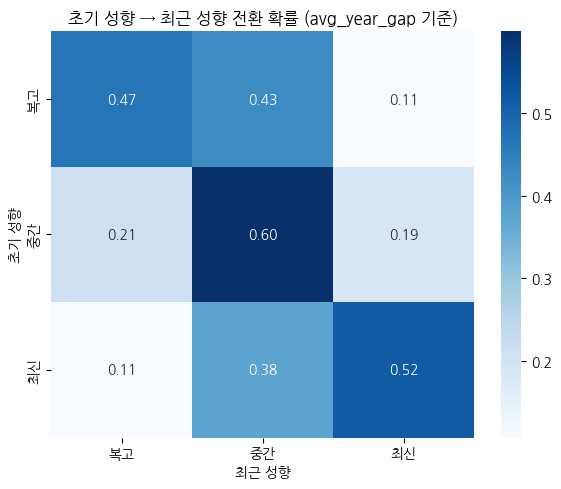

In [ ]:
plt.figure(figsize=(6,5))
sns.heatmap(transition, annot=True, cmap="Blues", fmt=".2f")
plt.title("초기 성향 → 최근 성향 전환 확률 (avg_year_gap 기준)")
plt.xlabel("최근 성향")
plt.ylabel("초기 성향")
plt.tight_layout()
plt.show()